In [11]:
# The shape of wine data is 178*13
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine 
from sklearn.preprocessing import StandardScaler
import mglearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import fowlkes_mallows_score

np.random.seed(0)

# feature scaling
num_classes = 3
data, target = load_wine(return_X_y=True)
target_names = load_wine().target_names 
num_features = data.shape[1]
scaler = StandardScaler() 
scaler.fit(data)
X_scaled = scaler.transform(data)

Adjust Rand index is 0.8974949815093207


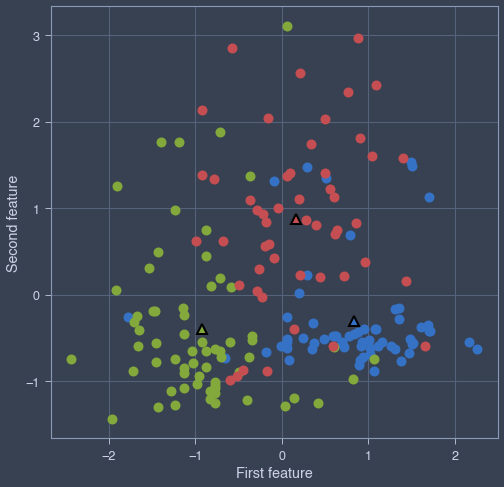

In [12]:
# kmeans without pca
kmeans = KMeans(n_clusters=num_classes, random_state=0) 
kmeans.fit(X_scaled)

print("Adjust Rand index is {}".format(adjusted_rand_score(target, kmeans.labels_)))

plt.figure(figsize=(8, 8))
plt.gca().set_aspect("equal")
plt.xlabel("First feature")
plt.ylabel("Second feature")
mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], kmeans.labels_, markers='o') 
mglearn.discrete_scatter(\
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

Original shape: (178, 13)
Reduced shape: (178, 13)


Text(0, 0.5, 'Second principal component')

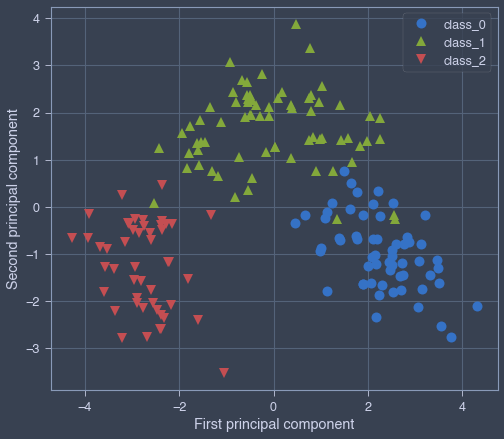

In [13]:
# Apply pca to scaled data

pca = PCA()
pca.fit(X_scaled)
X_scaled_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_scaled_pca.shape)))
#print("Explained variance ratio: {}".format(pca.explained_variance_ratio_))

# plot the first and second PCs
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], target) 
plt.legend(target_names, loc="best") 
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")




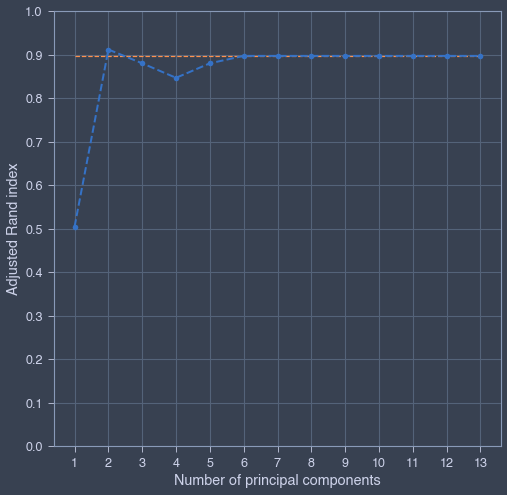

In [14]:
# external evaluation


adRand = np.zeros((num_features, 1))
FM = np.zeros((num_features, 1))
for i in np.arange(num_features):
    # build the clustering model for the first i PCs
    pca_kmeans = KMeans(n_clusters=num_classes, random_state=0) 
    pca_kmeans.fit(X_scaled_pca[:, :i+1])
    adRand[i] = adjusted_rand_score(target, pca_kmeans.labels_)
    FM[i] = fowlkes_mallows_score(target, pca_kmeans.labels_) 
    
plt.figure(figsize=(8, 8))
plt.ylim(0,1)
plt.gca().set_aspect("auto")
plt.xlabel("Number of principal components")
plt.ylabel("Adjusted Rand index")
plt.hlines(adjusted_rand_score(target, kmeans.labels_), 1, num_features, colors='y',linestyle='--')
plt.plot(np.arange(1, num_features+1), adRand, linestyle='--', marker='o', linewidth=2)
x_major_locator = plt.MultipleLocator(1)
y_major_locator = plt.MultipleLocator(0.1)
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.gca().yaxis.set_major_locator(y_major_locator)

#plt.title()


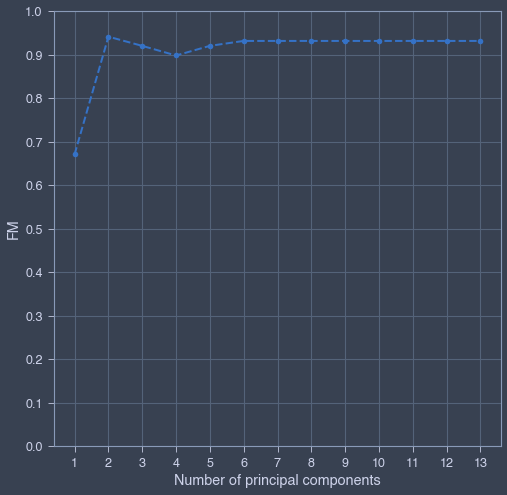

In [15]:
plt.figure(figsize=(8, 8))
plt.ylim(0,1)
plt.gca().set_aspect("auto")
plt.xlabel("Number of principal components")
plt.ylabel("FM")
plt.plot(np.arange(1, num_features+1), FM, linestyle='--', marker='o', linewidth=2)
x_major_locator = plt.MultipleLocator(1)
y_major_locator = plt.MultipleLocator(0.1)
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.gca().yaxis.set_major_locator(y_major_locator)

In [5]:


print(purity_score(labels_true, labels_pred))
print(purity_score(labels_true, pca_labels_pred))

0.9662921348314607
0.9662921348314607


In [6]:
from sklearn.metrics.cluster import adjusted_rand_score

print(adjusted_rand_score(labels_true, labels_pred))
print(adjusted_rand_score(labels_true, pca_labels_pred))

0.8974949815093207
0.8950582389649661
